In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *


Question 1

In [42]:
def one_param(L, n, alpha, q):
    theta = Symbol('theta')
    value_0 = 10
    diff_L = diff(L, theta)
    iterations = np.arange(0,n,1)
    J = [0]*n
    
    for i in range(n):
        value_new = value_0 - alpha*diff_L.subs(theta, value_0)
        value_0 = value_new
        
        J[i] = L.subs(theta, value_0)

    plt.plot(iterations, J)
    plt.xlabel("No of iterations")
    plt.ylabel("Loss function")
    plt.title(q)
    plt.show()
    print("theta_0 = {}".format(value_0))
    
    
def two_param(L, n, alpha, q):
    theta1 = Symbol('theta1')
    theta2 = Symbol('theta2')

    diff_theta1 = diff(L, theta1)
    diff_theta2 = diff(L, theta2)
    
    iterations = np.arange(0,n,1)
    
    value1_0 = 10
    value2_0 = 10
    
    J = [0]*n
    
    for i in range(n):
        value1_new = value1_0 - alpha*diff_theta1.subs({theta1:value1_0, theta2:value2_0})
        value2_new = value2_0 - alpha*diff_theta2.subs({theta1:value1_0, theta2:value2_0})
        
        value1_0 = value1_new
        value2_0 = value2_new
        
        J[i] = L.subs({theta1:value1_0, theta2:value2_0})
        
    plt.plot(iterations, J)
    plt.xlabel("No of iterations")
    plt.ylabel("Loss function")
    plt.title(q)
    plt.show()
    print("theta_1 = {}".format(value1_0))
    print("theta_2 = {}".format(value2_0))

# Question 1
theta = Symbol('theta')
L = theta**2


    part (a) : 

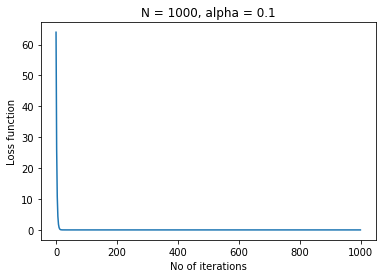

theta_0 = 1.23023192216112E-96


In [136]:
one_param(L, 1000, 0.1, "N = 1000, alpha = 0.1")

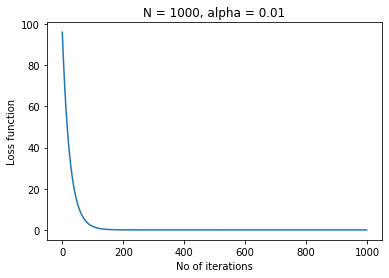

theta_0 = 1.68296735721596E-8


In [137]:
one_param(L, 1000, 0.01, "N = 1000, alpha = 0.01")

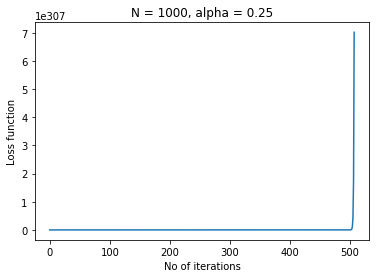

theta_0 = 1.07150860718627E+302


In [138]:
# Let's try with very high learning rate, for example 0.5
one_param(L, 1000, 1.5, 'N = 1000, alpha = 0.25')


# Clearly we can see exploding loss function from the following result
# This is due to exploding gradients, where due to very large step size
# gradient at  each subsequent jump is more than previous one, resulting in bigger and bigger
# steps, so function starts diverging instead of converging. 

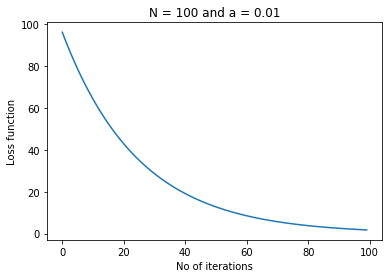

theta_0 = 1.32619555894753


In [43]:
one_param(L,100,0.01,'N = 100 and a = 0.01')

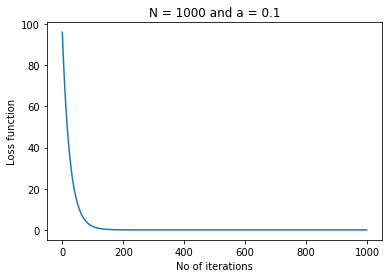

theta_0 = 1.68296735721596E-8


In [45]:
one_param(L,1000,0.01,'N = 1000 and a = 0.1')

    part(b) : 

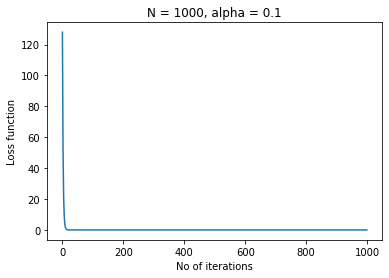

theta_1 = 1.23023192216112E-96
theta_2 = 1.23023192216112E-96


In [139]:
theta1 = Symbol("theta1")
theta2 = Symbol("theta2")

L = theta1**2 + theta2**2

two_param(L, 1000, 0.1, 'N = 1000, alpha = 0.1')

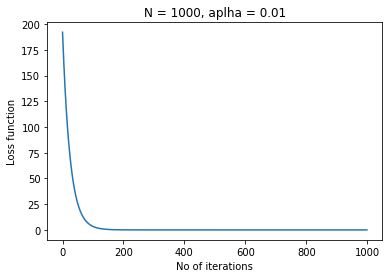

theta_1 = 1.68296735721596E-8
theta_2 = 1.68296735721596E-8


In [140]:
two_param(L, 1000, 0.01, 'N = 1000, aplha = 0.01')

Question 2


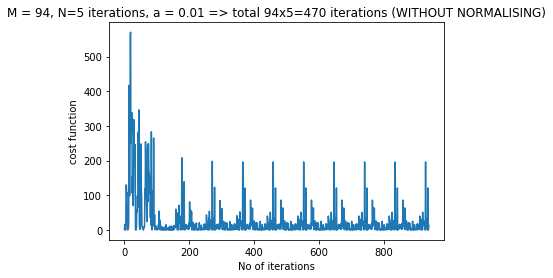

In [8]:
df = pd.read_excel('data for Problem1.xlsx')
y_ds = df.y
x_ds = df.x
df = df.sample(frac=1) # Randomly shuffling the dataset
std_y = np.std(y_ds)
mn_y = np.mean(y_ds)
std_x = np.std(x_ds)
mn_x = np.mean(x_ds)

# y_ds = (y_ds - mn_y)/std_y
x_ds = (x_ds - mn_x)/std_x

x = Symbol('x')
y = Symbol('y')

theta0 = Symbol('theta0')
theta1 = Symbol('theta1')

y_hat = theta0 + theta1*x
L = (y_hat - y)**2


value0 = 10
value1 = 10

m = len(df)
iters = 10
tot_iterations = np.arange(0,m*iters,1)

J = [0]*tot_iterations
a = 0.01

L_diff_t0 = L.diff(theta0)
L_diff_t1 = L.diff(theta1)

tmp=0
for i in range(iters):
  for j in range(m):
    value0_new = value0 - a*L_diff_t0.subs({theta0:value0, theta1:value1, x:x_ds[j], y:y_ds[j]})
    value1_new = value1 - a*L_diff_t1.subs({theta0:value0, theta1:value1, x:x_ds[j], y:y_ds[j]})

    value0 = value0_new
    value1 = value1_new

    J[tmp] = L.subs({theta0:value0, theta1:value1, x:x_ds[j], y:y_ds[j]})
    tmp+=1

plt.plot(tot_iterations, J)
plt.xlabel('No of iterations')
plt.ylabel('cost function')
plt.title('M = 94, N=5 iterations, a = 0.01 => total 94x5=470 iterations (WITHOUT NORMALISING)')
plt.show()





In [10]:
def Steepest_one_parameter(L,n,q):
  theta_0 = Symbol('theta_0')
  value_0 = 5
  dif_0 = diff(L,theta_0)
  a = Symbol('a')
  alpha = 0.1
  l_alpha = L.subs(theta_0,theta_0 - a*dif_0)
  print(l_alpha)
  l_alpha_1 = diff(l_alpha,a)
  l_alpha_2 = diff(l_alpha_1,a)
  l_alpha_t = l_alpha_1/l_alpha_2
  
  J = [0]*n
  iterations = np.arange(1,n+1,1)
  for i in range(n):
    for j in range (n):
      alpha = alpha - l_alpha_t.subs({a:alpha,theta_0:value_0})
    
    temp_0 = value_0 - alpha*dif_0.subs(theta_0,value_0)
    
    value_0 = temp_0
    J[i] = L.subs(theta_0,value_0)
  
  plt.plot(iterations,J)
  plt.xlabel('No of iterations')
  plt.ylabel('cost function')
  plt.title(q)
  plt.show()
  print('theta_0 is ' + str(value_0))
  
def Steepest_two_parameter(L,n,title):
  
  theta_0 = Symbol('theta_0')
  theta_1 = Symbol('theta_1')
  value_0 = 5
  value_1 = 5
  dif_0 = diff(L,theta_0)
  dif_1 = diff(L,theta_1)
  iterations = np.arange(1,n+1,1)
  J = [0]*n
  a = Symbol('a')
  alpha = 0.1
  l_alpha = L.subs({theta_0:theta_0 - a*dif_0,theta_1:theta_1 - a*dif_1})
  l_alpha_1 = diff(l_alpha,a)
  l_alpha_2 = diff(l_alpha_1,a)
  l_alpha_t = l_alpha_1/l_alpha_2
  
  for i in range(n):
    for j in range (n):
      alpha = alpha - l_alpha_t.subs({a:alpha,theta_0:value_0,theta_1:value_1})
    
    
    temp_0 = value_0 - alpha*dif_0.subs({theta_0:value_0, theta_1: value_1})
    temp_1 = value_1 - alpha*dif_1.subs({theta_0:value_0, theta_1: value_1})
    value_0 = temp_0
    value_1 = temp_1
    
    J[i]= L.subs({theta_0:value_0, theta_1: value_1})
   
  plt.plot(iterations,J)
  plt.xlabel('No of iterations')
  plt.ylabel('cost function')
  plt.title(title)
  plt.show()
  print('theta0 is ' + str(value_0))
  print('theta1 is ' + str(value_1))
  
  

theta_0 = Symbol('theta_0')
theta_1 = Symbol('theta_1')


(-2*a*theta_0 + theta_0)**2


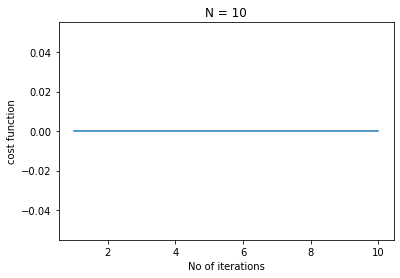

theta_0 is 0


In [11]:
L = theta_0**2
Steepest_one_parameter(L,10,'N = 10')

In [51]:
import math
def steepest_des_one(L, n, q):
    value0 = 10
    theta0 = Symbol('theta0')
    L_grad = diff(L, theta0)
    
    a = 0.01
    iterations = np.arange(0,n,1)
    J = [0]*iterations
    for i in range(n):
        d_k = L_grad.subs({theta0:value0})
        d_k = d_k/abs(d_k)
        value_new = value0 - a*d_k*L_grad.subs({theta0:value0})
        J[i] = L.subs({theta0:value_new})
        value0 = value_new
    
    plt.plot(iterations, J)
    plt.show()
        
def steepest_des_two(L, n, q):
    value0 = 10
    value1 = 10
    
    theta0, theta1 = Symbol('theta0'), Symbol('theta1')
    
    L_g1 = diff(L, theta0)
    L_g2 = diff(L, theta1)
    grad_L = np.array([L_g1, L_g2])
    a = 0.01
    iterations = np.arange(0,n,1)
    J = [0]*iterations
    
    a = 0.01
    for i in range(n):
        d_k = np.array([L_g1.subs({theta0:value0, theta1:value1}), L_g2.subs({theta0:value0, theta1:value1})])
        d_k = d_k/math.sqrt(d_k[0]**2 + d_k[1]**2)
        
        multiplier = L_g1*d_k[0] + L_g2*d_k[1]
        multiplier = multiplier.subs({theta0:value0, theta1:value1})
        value_new0 = value0 - a*multiplier
        value_new1 = value1 - a*multiplier
        J[i] = L.subs({theta0:value1_new, theta1:value1_new})
        value0 = value_new0
        value1 = value_new1
        
    plt.plot(iterations, J)
    plt.show()
        
        
    

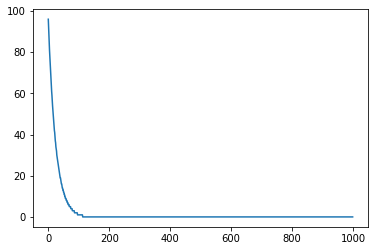

In [31]:
theta0 = Symbol('theta0')
L = theta0**2
steepest_des_one(L, 1000, 'h')

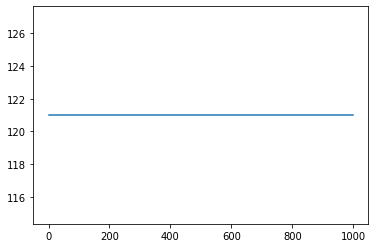

In [52]:
theta0, theta1 = Symbol('theta0'), Symbol('theta1')
L = theta0**2 + theta1**2
steepest_des_two(L, 1000, 'a')